# Linear regression

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li></ul></li><li><span><a href="#Simple-linear-regression" data-toc-modified-id="Simple-linear-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple linear regression</a></span><ul class="toc-item"><li><span><a href="#Let's-do-it-backwards" data-toc-modified-id="Let's-do-it-backwards-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Let's do it backwards</a></span></li></ul></li><li><span><a href="#We-generate-data-to-explain-in-an-&quot;inverse&quot;-way-to-what-was-seen-a-moment-ago" data-toc-modified-id="We-generate-data-to-explain-in-an-&quot;inverse&quot;-way-to-what-was-seen-a-moment-ago-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>We generate data to explain in an "inverse" way to what was seen a moment ago</a></span></li><li><span><a href="#We-draw-the-regression-line" data-toc-modified-id="We-draw-the-regression-line-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>We draw the regression line</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Mini-recap" data-toc-modified-id="Mini-recap-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Mini-recap</a></span></li></ul></li></ul></li><li><span><a href="#How-good-is-our-model?" data-toc-modified-id="How-good-is-our-model?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>How good is our model?</a></span></li><li><span><a href="#Calculate-the-R2-of-the-model" data-toc-modified-id="Calculate-the-R2-of-the-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Calculate the R2 of the model</a></span></li><li><span><a href="#Linear-regression-with-sklearn" data-toc-modified-id="Linear-regression-with-sklearn-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Linear regression with sklearn</a></span></li><li><span><a href="#Linear-regression-with-statsmodels" data-toc-modified-id="Linear-regression-with-statsmodels-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Linear regression with statsmodels</a></span></li><li><span><a href="#OLS-Concepts" data-toc-modified-id="OLS-Concepts-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>OLS Concepts</a></span></li><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Multiple Linear Regression</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Categorical variables</a></span></li><li><span><a href="#Linear-model-extensions" data-toc-modified-id="Linear-model-extensions-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Linear model extensions</a></span><ul class="toc-item"><li><span><a href="#Challenging-the-additive-assumption:-synergy" data-toc-modified-id="Challenging-the-additive-assumption:-synergy-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Challenging the additive assumption: synergy</a></span></li></ul></li><li><span><a href="#Let's-do-it" data-toc-modified-id="Let's-do-it-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Let's do it</a></span><ul class="toc-item"><li><span><a href="#$R^2$-Adjusted" data-toc-modified-id="$R^2$-Adjusted-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>$R^2$ Adjusted</a></span></li></ul></li><li><span><a href="#Potential-problems-in-linear-regression" data-toc-modified-id="Potential-problems-in-linear-regression-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Potential problems in linear regression</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Further-Materials" data-toc-modified-id="Further-Materials-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Further Materials</a></span></li></ul></div>

In [129]:
#!pip install scikit-learn

In [130]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

## Motivation

In [131]:
data = pd.read_csv("../datasets/hours_vs_mark.csv", index_col=0)

In [132]:
data

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86
...,...,...
95,252,66
96,49,21
97,792,97
98,310,46


We have 100 students, and we know:
 * How many hours they studied for their exam
 * The grade they have obtained (from 0 to 100)

### Exploratory Analysis

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hours   100 non-null    int64
 1   mark    100 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


In [134]:
data.shape

(100, 2)

In [135]:
data.describe()

,hours,mark
count,100.000000,100.000000
mean,428.540000,47.940000
std,285.241752,27.757907
min,2.000000,0.000000
25%,167.250000,29.500000
50%,424.500000,44.000000
75%,662.500000,68.000000
max,986.000000,100.000000


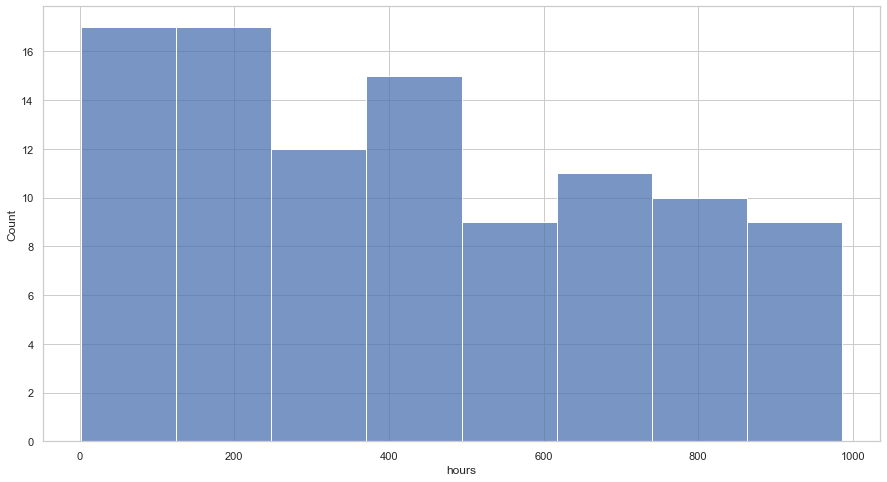

In [136]:
sns.histplot(data.hours);

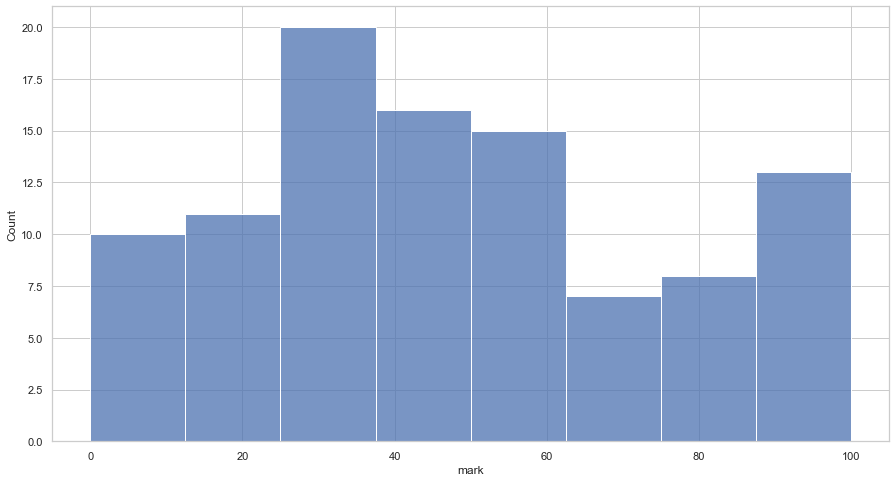

In [137]:
sns.histplot(data.mark);

We would like to understand the relationship $$grade = f(hours)$$

To be able to **predict the expected grade** that we will obtain when studying a certain number of hours

In [138]:
data.corr()

,hours,mark
hours,1.000000,0.867072
mark,0.867072,1.000000


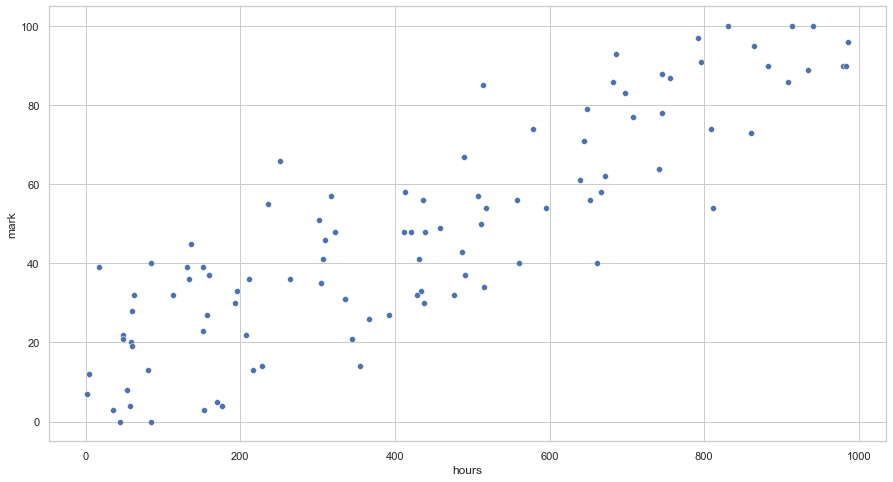

In [139]:
sns.scatterplot(x=data["hours"], y=data["mark"]);

Let's try a $$Y = m * X + n$$ linear regression
$m$ is the slope
$n$ is the value of $Y$ when $X=0$
And we have to:
$$grade = m * hours + n$$
We want to find $m$ and $n$ that *best* model our data


In [140]:
data["prediction_1"] = 0.1 * data.hours + 5 # equation of a line
data["prediction_2"] = 0.12 * data.hours + 10

In [141]:
data.head()

,hours,mark,prediction_1,prediction_2
0,865,95,91.5,113.80
1,4,12,5.4,10.48
2,305,35,35.5,46.60
3,437,56,48.7,62.44
4,682,86,73.2,91.84


In [142]:
def predict_grade (hours):
    return hours * 0.1 + 5

In [143]:
predict_grade(865)

91.5

Which has worked better? How can we measure the error of the models?

We can subtract our prediction from the grade to see what we have done wrong in each one and make the average.... we use the absolute value to remove the negative values ​​and then we talk about this error, which has a name and it is MAE (mean absolutely error)

In [144]:
data["error_1"] = (data.mark - data["prediction_1"]).abs()
data["error_2"] = (data.mark - data["prediction_2"]).abs()

In [145]:
data.head()

,hours,mark,prediction_1,prediction_2,error_1,error_2
0,865,95,91.5,113.80,3.5,18.80
1,4,12,5.4,10.48,6.6,1.52
2,305,35,35.5,46.60,0.5,11.60
3,437,56,48.7,62.44,7.3,6.44
4,682,86,73.2,91.84,12.8,5.84


In [146]:
data.error_1.mean()

12.008

In [147]:
data.error_2.mean()

18.073599999999995

What is going to be our goal? Python and its libraries do this for us, it calculates the slope and the intercept to be able to make "predictions" of unknown data from data that we already have.

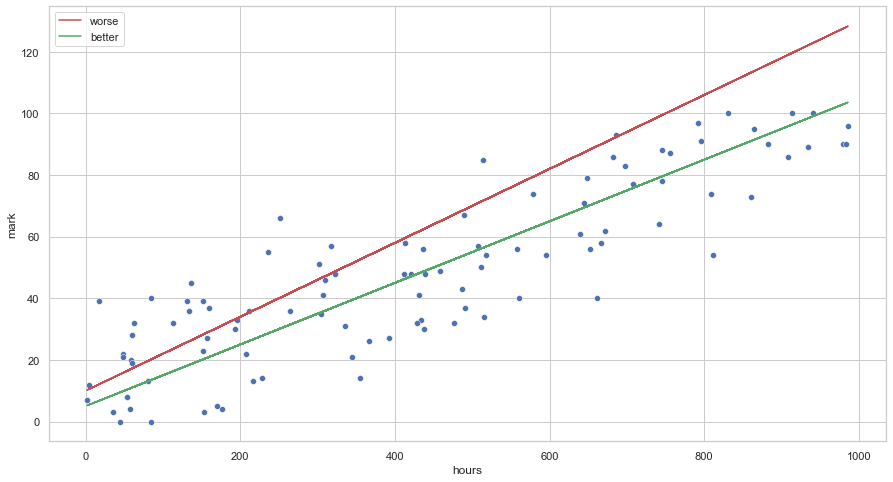

In [148]:
sns.scatterplot(x=data["hours"], y=data["mark"])
plt.plot(data.hours, data["prediction_2"], color='r', label='worse') # greater Mean Average Error
plt.plot(data.hours, data["prediction_1"], color='g', label='better')
plt.legend();

## Simple linear regression

Simple linear regression a statistical model that assumes a linear relationship between a predictor and a target variable. Mathematically, it can be expressed as:

![formula](../images/formula.png)

If we dig a little deeper, we can find this other expression:

 $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

Where:
* $X$ = predictor variable
* $Y$ = target variable
* $\beta_0$ = intercept
* $\beta_1$ = slope / slope
* $\epsilon$ = noise (gaussian)


The above equation is known as the *population regression line*.
The simple linear regression line usually has the form shown in the formula above, where β0 and β1 are unknown constants, representing the intercept and slope of the regression line, respectively.

The intercept is the value of the dependent variable (Y) when the independent variable (X) has a value of zero (0). The slope is a measure of the rate at which the dependent variable (Y) changes when the independent variable (X) changes by one (1). The unknown constants are called the coefficients or parameters of the model. This form of the regression line is sometimes known as a population regression line and, as a probabilistic model, it roughly fits the data set hence the use of the symbol (≈) in the image. The model is called probabilistic because it does not model all the variability of the dependent variable (Y)

### Let's do it backwards
![upsidedown](https://media.giphy.com/media/q2liPHzYo82zK9Tb0X/giphy.gif)

## We generate data to explain in an "inverse" way to what was seen a moment ago

In [149]:
# From the previous example
beta_0 = 10 # n, intercept
beta_1 = 0.08 # slope
num_grades = 100

np.random normal documentation --> https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
Parameters:
- Mean
- Standard deviation
- Sample size

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) random normal

In [150]:
# We generate the hours of study
X = np.random.normal(600, 150, size=100)

In [151]:
X

array([ 474.87159594,  470.5431648 ,  502.77909842,  758.90315899,
        447.87388806,  396.15940974,  589.04475367,  527.53955829,
        374.28921944,  432.55490199,  703.37912973,  473.10914473,
        673.37757747,  588.98137624,  626.17298641,  662.06891598,
        400.93497422,  666.32754671,  441.8307657 ,  336.52781317,
       1014.95232137,  554.12980344,  846.01548046,  861.64510181,
        301.32190324,  738.71414814,  588.03117082,  707.63607513,
        610.11562588,  819.14886372,  223.18639283,  472.5350569 ,
        336.72918064,  827.19140841,  235.50579168,  611.38963455,
        252.99148775,  684.01756512,  559.97496455,  826.95584514,
        256.30897242,  688.69221542,  769.89715624,  606.30847311,
        527.388307  ,  672.2775276 ,  574.98612473,  621.73524762,
        490.866387  ,  680.86559812,  530.12800216,  685.76821731,
        585.87013438,  511.08084028,  720.02749516,  639.39098898,
        463.8428264 ,  540.03347655,  864.09715724,  663.16013

When generating the grades we enter that np.random.normal which is going to be a random number for each note that is going to make the note vary. It's a random error. We put it because we are inventing the data and if we do it simply through the formula of a straight line, obviously, we will have data that fit a regression PERFECTLY and that is not real.

In [152]:
# Generating the grades
y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_grades)

In [153]:
y

array([51.24683189, 46.5008778 , 54.06264913, 67.51029308, 47.93488622,
       43.4588301 , 64.21930628, 47.5963949 , 33.54759575, 36.96087389,
       61.47452267, 45.48244957, 70.74188978, 68.37767687, 54.64038752,
       62.31018713, 48.04348719, 64.93587828, 45.73574224, 39.33169399,
       87.74105782, 53.75811876, 83.04793062, 77.17224189, 29.87114783,
       69.20294099, 55.67568358, 70.38762707, 58.70100944, 73.88837878,
       27.05849151, 47.76842681, 38.31915635, 75.66850547, 24.43636391,
       57.12948654, 37.9783702 , 68.4844642 , 63.91964451, 82.38728595,
       31.81095249, 58.40910761, 77.51416831, 63.42659585, 48.55182929,
       72.7094275 , 49.80253321, 67.69678736, 44.77201245, 59.14416227,
       42.62189743, 70.24000301, 63.04273715, 45.75165463, 70.71286158,
       70.40047163, 41.83748097, 52.33160878, 77.00713715, 62.81414389,
       50.5719062 , 52.26211141, 49.17610968, 51.24635649, 52.11585065,
       49.69181711, 22.20792132, 35.53951801, 50.45085088, 66.69

In [154]:
# Generating the dataframe
df = pd.DataFrame({"hours": X, "grade": y}).round().astype(int)

In [155]:
df.head()

,hours,grade
0,475,51
1,471,47
2,503,54
3,759,68
4,448,48


## We draw the regression line

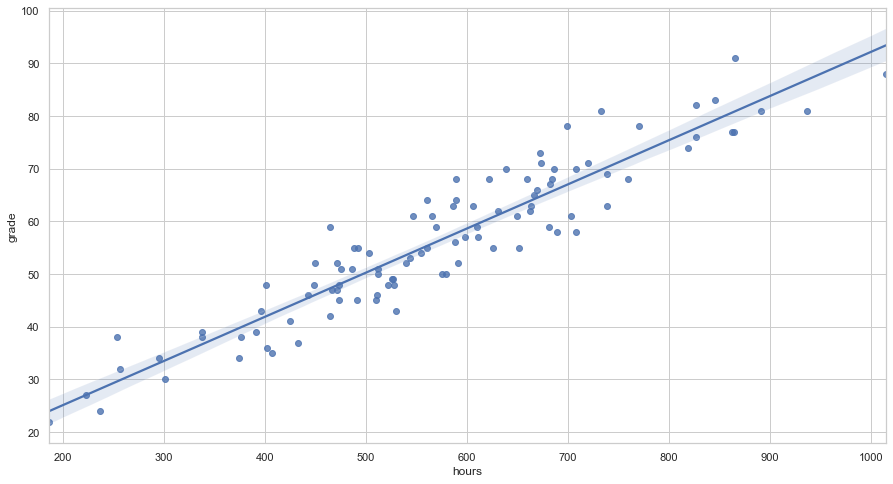

In [156]:
sns.regplot(x="hours", y="grade", data=df);

In [157]:
### We draw an example of the data WITHOUT RANDOM ERROR

In [158]:
y_not_real = beta_0 + (beta_1 * X)  # the y is simply the equation of the line
df_not_real = pd.DataFrame({"hours": X, "grade": y_not_real}).round().astype(int)

In [159]:
# Not a perfect match: I'm rounding numbers

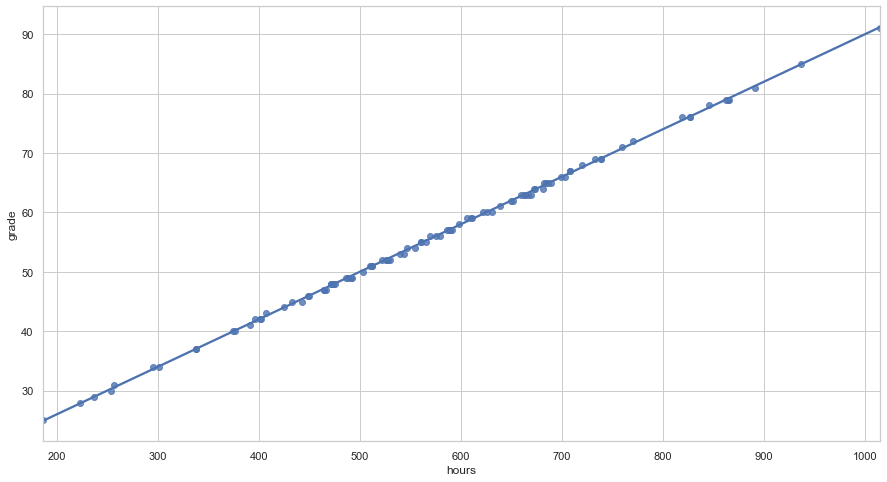

In [160]:
sns.regplot(x="hours", y="grade", data=df_not_real);

Of course, in real life we ​​don't know the true parameters of the model, nor if the model is real!!! Today we are going to learn a [valuable lesson](https://en.wikipedia.org/wiki/All_models_are_wrong):


<center> <b>"All the models are wrong, but some are useful"</b> </center>


In practice, what we do is, after seeing a scatter plot like the one above, we try to infer the model parameters $\beta_0$ and the slope, $\beta_1$. Once estimated, the estimated fit becomes $$ \hat{Y} = \hat{beta_0} + \hat{beta_1} X$$

We are going to train a regression model that removes the coefficients with sklearn and we do it with the first model that we have generated that had NOISE/ERROR

In [161]:
lr = LinearRegression()

In [163]:
lr.fit(
    X = df[["hours"]], #hours, DATAFRAME
    y = df["grade"] # grade, Series
)

LinearRegression()

In [176]:
[element for element in dir(lr)][:2]
# I found:
    # intercept_
    # coef_

['__abstractmethods__', '__class__']

In [173]:
beta_0 = lr.intercept_ # where it crosses the Y axis: N
beta_0

8.394228135212174

In [241]:
beta_1 = lr.coef_[0] # slope, what multiplies the X: M
beta_1

0.08437787096170372

In [ ]:
# y = x * beta_1 + beta_0

In [177]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(f"beta_0: {beta_0}, which is the intercept\nbeta_1: {beta_1}, which is the slope or coef_[0]")

beta_0: 8.394228135212174, which is the intercept
beta_1: 0.0837618697006278, which is the slope or coef_[0]


In [178]:
data.sample()

,hours,mark,prediction_1,prediction_2,error_1,error_2
62,412,48,46.2,59.44,1.8,11.44


In [179]:
data_2 = pd.read_csv("../datasets/hours_vs_mark.csv", index_col=0)
data_2.sample()

,hours,mark
19,831,100


In [180]:
data_2["prediction_through_lr_scikitlearn"] = (data_2.hours * beta_1) + beta_0
data_2

,hours,mark,prediction_through_lr_scikitlearn
0,865,95,80.848245
1,4,12,8.729276
2,305,35,33.941598
3,437,56,44.998165
4,682,86,65.519823
...,...,...,...
95,252,66,29.502219
96,49,21,12.498560
97,792,97,74.733629
98,310,46,34.360408


`coef_` It will be a list of coefficients of all the predictor variables, in this case we only have one, the hours we have studied

#### Mini-recap

- Two-variables: relationship
    - Explotarion
        - Visually: 
            - histograms for each of them
            - scatterplot fot both
            - regplot: regression line on scatterplot
        - Numerically
            - Correlation
            - lr
    - Model
       - Summarizing the info we have
       - Predicting
       - How to:
           - lr from sci-kit learn
               - 1. Instantiate
               - 2. Do the fit of the data: what is the line that best fits my data?: lr.fit(X, y)

In [181]:
# MAE: Mean absolute error (one of the metrics)
# By looking at the error: how far the prediction is from the actual value
# we can select a model over another

# The goal is to **minimze the error**: the lower it is, the better our model should be

Reminder for the syntax life of an ML model

```python
SYNTAX = MODEL.FIT (X,y)
```

## How good is our model?

The numerical difference between the *least squares regression line* and the actual value is called the *residual* , and it represents the error in the estimate: $e = y_i - \hat{y}$.
The regression line minimized the **Residual Sum of Squares** (RSS)

The residual sum of squares measures the amount of error remaining between the regression function and the data set. a smaller residual sum of squares represents a regression function. The residual sum of squares, also known as the sum of squared residuals, essentially determines how well a regression model explains or represents the data in the model.

$$RSS = e_1^2 + e_2^2 + \dots + e_n ^2$$

If we only used the mean as the predicted value for each prediction, the error we would make is (**total sum of squares**)

$$TSS=\Sigma(y_i - \bar{y}_i)^2$$
Let's consider this our starting point, make a prediction and plot it

In [191]:
data["avg"] = data.mark.mean()
data.sample()

,hours,mark,prediction_1,prediction_2,error_1,error_2,avg
10,264,36,31.4,41.68,4.6,5.68,47.94


In [198]:
data_2["avg"] = data_2.mark.mean()
data_2

,hours,mark,prediction_through_lr_scikitlearn,avg
0,865,95,80.848245,47.94
1,4,12,8.729276,47.94
2,305,35,33.941598,47.94
3,437,56,44.998165,47.94
4,682,86,65.519823,47.94
...,...,...,...,...
95,252,66,29.502219,47.94
96,49,21,12.498560,47.94
97,792,97,74.733629,47.94
98,310,46,34.360408,47.94


In [ ]:
TSS
RSS

# How far the data points fall from the mean
# How far each point is from the predicted value -> residuals

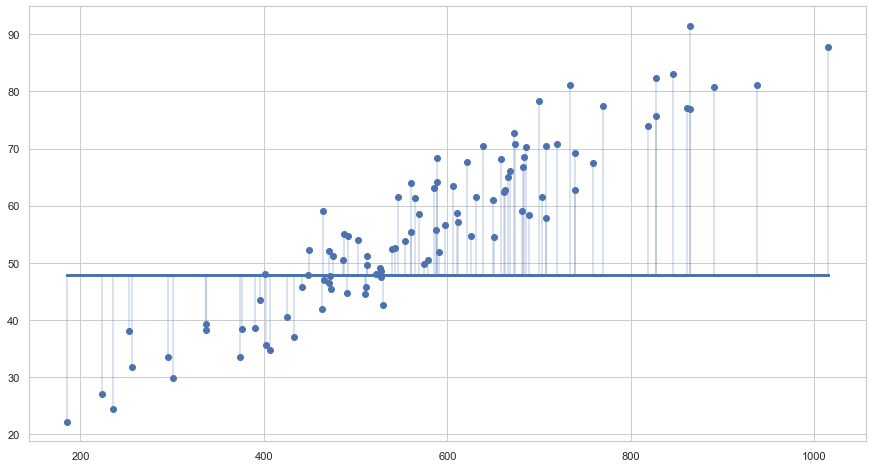

In [194]:
plt.scatter(X, y)
plt.plot(X, data["avg"], lw=3)
plt.vlines(X, data["avg"], y, lw=0.4);

Recall that linear regression coefficients minimize the $RSS=Sigma(y_i - \hat{y_i})^2$, that is, the amount of variability that remains unexplained after running the regression. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination):

$$R^2 = \frac{TSS -RSS}{TSS} = 1-\frac{RSS}{TSS}$$

measures the "*proportion of variability in Y that can be explained by X*". It is a measure of the linear relationship that exists between $X$ and $y$.

**Note:** in the case of simple linear regression, the $R^2$ coefficient is nothing more than the square of the *Pearson* correlation coefficient that we already know.

In [ ]:
# r2 will be the indicator that will tell me how good the model is

## Calculate the R2 of the model

In [197]:
RSS = ((data_2.mark - data_2["prediction_through_lr_scikitlearn"]) ** 2).sum()
RSS #residual sum of squares

20267.251590583513

In [200]:
TSS = ((data_2.mark - data_2["avg"]) ** 2).sum()
TSS

76279.64

In [201]:
r2 = 1 - (RSS/TSS)
r2

0.7343032611246787

In [ ]:
# r2 can take values: 0-1
# can it be negative?: 


# r2: representing the proportion of variability of Y explained by X
# If my model was predicting to a 100% and my r2 was 1: Y is perfectly explained by X

$R^2$ measures how good our regression model is. The bigger the better. It is a value between 0 and 1

**NOTE**: it is computable for any model, it does not matter if it is linear or not. Only the actual and predicted values ​​are needed.

In [202]:
# How good it is: r2
# It goes 0 - 1
# The bigger, the better
# Compare between models we use r2. We'll choose the one with highest r2
    # TSS & RSS
        # One looks at how far the points are from the line
        # Another one looks hwo far they are from the mean

## Linear regression with sklearn

In [205]:
data_2.head()

,hours,mark,prediction_through_lr_scikitlearn,avg
0,865,95,80.848245,47.94
1,4,12,8.729276,47.94
2,305,35,33.941598,47.94
3,437,56,44.998165,47.94
4,682,86,65.519823,47.94


In [213]:
X = data_2[["hours"]] #Double brackets for scikit-learn
y = data_2["mark"]

In [214]:
# Instantiate
lr_2 = LinearRegression()

In [215]:
# Training
lr_2.fit(X, y)

LinearRegression()

In [216]:
data_2["prediction_2"] = lr_2.predict(X)

In [218]:
data_2.drop(["prediction_through_lr_scikitlearn"], axis=1, inplace=True)

In [220]:
data_2.drop(["avg"], axis=1, inplace=True)

# 1. Select the data: `my_variables = X, y` # independant X, dependant y. target variable -> y (grades)
# 2. Fit the model to the data: `my_model = lr.fit(X, y)`
# 3. Predict with the model fitted: `predicted_y = lr.predict(X)`

In [221]:
data_2

,hours,mark,prediction_2
0,865,95,84.767566
1,4,12,12.118219
2,305,35,37.515958
3,437,56,48.653837
4,682,86,69.326415
...,...,...,...
95,252,66,33.043931
96,49,21,15.915223
97,792,97,78.607981
98,310,46,37.937847


In [222]:
from sklearn import metrics

**Calculation of the absolute mean error, the mean square error and the mean square error

- **MAE** is the easiest to understand, because it is the mean error.
- **The MSE** is more popular than the MAE, because the MSE accounts for larger errors, which is often useful in the real world.
- **RMSE** is even more popular than MSE, it is the square root of the MSE and measures the standard deviation of the residuals.

These are all **loss functions**: we want to minimize them.

In [ ]:
# Error metrics: how bad it is predicting
    # MAE: calculating each error individually and doing the average
    # MSE (Mean squared error)
    # RMSE (Root Mean Squared Error) 

# R2: how good the model is
    #r2 = 1- RSS/TSS

In [ ]:
# Errors can be as high as you want 
# r2: up to 1

In [229]:
mae = metrics.mean_absolute_error(data_2.mark, data_2.prediction_2)
mse = metrics.mean_squared_error(data_2.mark, data_2.prediction_2)
rmse = np.sqrt(metrics.mean_squared_error(data_2.mark, data_2.prediction_2))
r2 = metrics.r2_score(data_2.mark, data_2.prediction_2)

In [226]:
mae

11.402698299019335

In [227]:
mse

189.31609105092303

In [228]:
rmse

13.759218402617318

In [230]:
r2 # Coefficient of determination

0.7518130774464549

Read more about MAE, MSE, RMSE AND R2 [here](http://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e)

In [ ]:
1. Define X, y
2. fit
3. predict
4. Look at errors & r2

In [232]:
print("""
What: line
Does: summarize & predict
Does through: relating two quantitative variables
""")


What: line
Does: summarize & predict
Does through: relating two quantitative variables



In [233]:
print("""
What: model
Does: summarize & predict
What it does: relating two quantitative variables
Check how good it is: error & r2
""")


What: model
Does: summarize & predict
What it does: relating two quantitative variables
Check how good it is: error & r2



## Linear regression with statsmodels

A bit of [documentation](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)

And [this article](https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01) that summarizes how to interpret OLS summary information

In [ ]:
# Orindary least squares

In [ ]:
#sci-kitl earn takes the X and the y

In [236]:
results = smf.ols("mark ~ hours", data=data_2).fit()

In [237]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mark   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     296.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.04e-31
Time:                        12:17:56   Log-Likelihood:                -404.06
No. Observations:                 100   AIC:                             812.1
Df Residuals:                      98   BIC:                             817.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7807      2.517      4.680      0.000       6.785      16.776
hours          0.0844      0.005     17.230      0.000       0.075       0.094
==============================================================================
Omnibus:                        3.288   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                1.926
Skew:                           0.010   Prob(JB):                        0.382
Kurtosis:                       2.320   Cond. No.                         931.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# virgulilla in spanish
# tilde: à é ì
# wiggly line

## OLS Concepts

- <b>R2</b> : The coefficient of determination measures how much of the variation of 𝑦 is explained by the model.
If the variance of the errors or residuals 𝜎2𝑒 is zero, the model explains 100% of the variable 𝑦. If 𝜎2𝑒 is equal to the variance of 𝑦 the model explains nothing and 𝑅2 is equal to zero.


- <b>𝑅¯2 </b> : The adjusted correlation coefficient 𝑅¯2 corrects the value of 𝑅2 by the number of variables 𝑘 (equal to 2 for the analyzed case) and the amount of data 𝑁

- <b>P value </b> The p-value for each term tests the null hypothesis that the coefficient is equal to zero (has no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. ... Typically p-values ​​are used to determine which terms should be kept in the regression model.


Description of the p value:
The p-value is a probability value, so it ranges between 0 and 1. The p-value shows us the probability of having obtained the result that we have obtained assuming that the null hypothesis H0 is true. It is often said that high values ​​of p do not allow H0 to be rejected, while low p values ​​do allow H0 to be rejected.

In a statistical test, the null hypothesis H0 is rejected if the p-value associated with the observed result is equal to or less than an arbitrarily set $\alpha$ significance level, conventionally 0.05 or 0.01. In other words, if the result obtained is more unusual than the expected range of results given a true null hypothesis H0 and the chosen significance level $\alpha$, that is, if p is less than $\alpha$, we can say that we have a statistically significant result that allows reject H0.

It is important to emphasize that a hypothesis test does not allow accepting a hypothesis; he simply rejects it or does not reject it, that is to say, he dismisses it as plausible (which does not necessarily mean that it is true, simply that it is more likely to be) or implausible.

## Multiple Linear Regression

Of course, the hours one studies are not the only important factor in getting good grades in the real world. We can think of IQ, for example, as another determining factor. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m + \epsilon$$
 
 In this case, what we are going to do is add a variable that subtracts from the note, the party hours.
 Imagine that for every hour that we go out partying, neurons in our brain die and we forget information, therefore, we will lose a grade (remember that we are inventing data)

In [242]:
# Goal: how are grades related to study_hours and party_hours?

beta_0 = 10 # intercept
beta_1 = 0.08 # coefficient_1
beta_2 = -0.03 # coefficient_2
num_grades = 100

In [243]:
# Fake the data

study_hours = np.random.normal(500, 200, num_grades)
party_hours = np.random.normal(500, 200, num_grades)

In [246]:
party_hours[:5]

array([694.57609367, 978.05531736, 526.76319193, 113.08619765,
       630.38722236])

In [249]:
y = beta_0 + study_hours * beta_1 + beta_2 * party_hours + np.random.normal(0, 5, 100)

In [251]:
data = pd.DataFrame({"grades": y, "study_hours": study_hours, "party_hours": party_hours})

In [252]:
data.sample()

,grades,study_hours,party_hours
87,5.1731,250.600138,592.818834


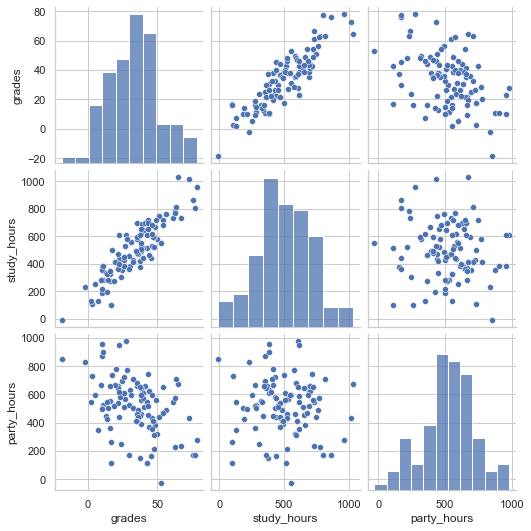

In [253]:
sns.pairplot(data);

The multiple linear regression coefficients are computed in a similar way to the simple linear regression case: they minimize

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{beta_0} + \hat{beta_1 X_1} + \hat{beta_2} X_2 + \hat + \hat{\beta_2} X_m$$

In [ ]:
# We analyze the results with the OLS

The coefficient is the number by which we multiply the predictor variable (X) in this case we have two, study hours and party hours.
The positive coefficient indicates that the correlation is positive (the more hours I study, the better the grade I get) and the coefficient of party hours is negative, therefore it indicates that if that predictive variable is greater, my target variable decreases.

In [254]:
results = smf.ols("grades ~ study_hours + party_hours", data=data).fit()

In [255]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     577.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.31e-54
Time:                        12:36:36   Log-Likelihood:                -305.74
No. Observations:                 100   AIC:                             617.5
Df Residuals:                      97   BIC:                             625.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.6896      2.031      5.757      0.000       7.659      15.720
study_hours     0.0786      0.003     30.553      0.000       0.074       0.084
party_hours    -0.0333      0.003    -12.500      0.000      -0.039      -0.028
==============================================================================
Omnibus:                        3.184   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                3.189
Skew:                           0.407   Prob(JB):                        0.203
Kurtosis:                       2.681   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [258]:
# Without party_hours
results_2 = smf.ols("grades ~ study_hours", data=data).fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     386.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           8.65e-36
Time:                        12:39:06   Log-Likelihood:                -353.72
No. Observations:                 100   AIC:                             711.4
Df Residuals:                      98   BIC:                             716.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.9140      2.221     -3.113      0.002     -11.321      -2.507
study_hours     0.0811      0.004     19.664      0.000       0.073       0.089
==============================================================================
Omnibus:                        1.330   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.145
Skew:                           0.057   Prob(JB):                        0.564
Kurtosis:                       2.489   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Categorical variables

Very often we are faced with situations where the predictors are *qualitative* in nature. A good example could be the music they listen to which can take the values ​​$rock$ or $indie$.

In [ ]:
# grades
# party
# study

# type of music: rock & indie

In [259]:
data["music"] = np.random.choice(["indie", "rock"], num_grades)

In [272]:
data.sample(3)

,grades,study_hours,party_hours,music
10,75.973941,863.720181,168.768645,rock
31,2.796388,105.874731,732.476187,indie
43,37.802853,416.054934,447.408952,rock


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   grades       100 non-null    float64
 1   study_hours  100 non-null    float64
 2   party_hours  100 non-null    float64
 3   music        100 non-null    object 
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [275]:
pd.get_dummies(data)

,grades,study_hours,party_hours,music_indie,music_rock
0,24.917314,352.726717,694.576094,1,0
1,27.699406,607.141865,978.055317,0,1
2,11.142832,281.171665,526.763192,0,1
3,42.319486,511.006638,113.086198,0,1
4,30.214617,385.623496,630.387222,1,0
...,...,...,...,...,...
95,43.774466,465.635209,365.683394,1,0
96,46.053987,616.775019,351.397315,1,0
97,43.196918,653.410279,454.034443,1,0
98,77.162659,801.751586,171.629670,1,0


In [278]:
data["music_rock"] = data.music.str.get_dummies()["rock"]

In [279]:
data.sample(3)

,grades,study_hours,party_hours,music,music_rock
67,10.036553,212.509701,498.009547,indie,0
30,35.866366,483.134583,490.711172,indie,0
3,42.319486,511.006638,113.086198,rock,1


In [280]:
results = smf.ols("grades ~ study_hours + party_hours + music_rock", data=data).fit()

In [281]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     381.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           3.37e-53
Time:                        12:48:30   Log-Likelihood:                -305.68
No. Observations:                 100   AIC:                             619.4
Df Residuals:                      96   BIC:                             629.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.5417      2.088      5.527      0.000       7.396      15.687
study_hours     0.0785      0.003     29.936      0.000       0.073       0.084
party_hours    -0.0332      0.003    -12.360      0.000      -0.039      -0.028
music_rock      0.3542      1.071      0.331      0.741      -1.771       2.479
==============================================================================
Omnibus:                        3.025   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                3.025
Skew:                           0.391   Prob(JB):                        0.220
Kurtosis:                       2.664   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [282]:
data["music_new"] = np.random.choice(["indie", "rock", "pop"], num_grades)
data["music_pop"] = data.music_new.str.get_dummies()["pop"]

In [284]:
smf.ols("grades ~ study_hours + party_hours + music_rock + music_pop", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     290.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.41e-52
Time:                        12:51:33   Log-Likelihood:                -304.53
No. Observations:                 100   AIC:                             619.1
Df Residuals:                      95   BIC:                             632.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.1587      2.091      5.336      0.000       7.007      15.310
study_hours     0.0785      0.003     30.142      0.000       0.073       0.084
party_hours    -0.0335      0.003    -12.516      0.000      -0.039      -0.028
music_rock      0.4435      1.066      0.416      0.678      -1.672       2.559
music_pop       1.7576      1.182      1.487      0.140      -0.588       4.103
==============================================================================
Omnibus:                        2.658   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.670
Skew:                           0.369   Prob(JB):                        0.263
Kurtosis:                       2.689   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [285]:
# Study hours and party hours > just study hours
# rock > rock & pop

# it is true that we have a slightly better r2
# even though we're using variables that don't really add value to the prediction

# trying to accomodate the data too well

In [ ]:
# over-fitting: we are predicting so well for the data we have
# that won't be predicting for new data

We include this information in the model through a *dummy* variable:
$$
x_i= \left\{
\begin{array}{ll}
      1  \quad \text{if listens to rock} \\
      0  \quad \text{if listens to indie} \\
\end{array} 
\right. 
$$


If this is our only variable, this results in a model:

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i = \left\{
\begin{array}{ll}
      \beta_0 + \beta_1 +\epsilon_i  \quad \text{if listens to rock} \\
      \beta_0 + \epsilon_i  \quad \text{if listens to indie} \\
\end{array} 
\right.  $$

In this case, $\beta_0$ represents the average score of people who listen to rock, and $\beta_0 + \beta_1$ the average score of people who listen to indie.

## Linear model extensions

There are several assumptions used when fitting a linear model.
Linear model assumptions 
[VIDEO](https://www.youtube.com/watch?v=hVe2F9krrWk)

* Errors are normally distributed and have constant variance: luxury items
* Errors are not correlated with each other

***Additive Assumption** The effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values ​​of the other predictors.

***Linear Assumption**The change in the answer for a unit increase in $X_j$ is the same regardless of the value of $X_j$.

### Challenging the additive assumption: synergy

Sometimes our variables will have natural interactions. For example, we may think that the more our ads are heard on the radio, the more effective our TV ads will be. That is, the effect of both is *greater* (or *lesser*) than the sum of the parts.

This is a commonly studied topic in [marketing](https://smallbusiness.chron.com/definition-synergy-marketing-21786.html)

In [286]:
df_adv = pd.read_csv('../datasets/Advertising.csv')

## Let's do it
* Create three independent simple linear regression models
* Interpret the results
* Create a multivariate model with the three predictors
* Interpret the results

The difference is that the covariance gives us the direction (positive or negative) between the variables and the correlation gives us this plus the strength of it.

Remember the **hierarchical principle:**

"*If we include an interaction in a model, we must also include the main effects, even if the p-values ​​associated with its coefficients are not significant*"

### $R^2$ Adjusted
There is a curious thing with $R^2$. Look what happens when we include *random* variables!

"It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared."

In [289]:
df_adv = pd.read_csv('../datasets/Advertising.csv')

In [290]:
df_adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [291]:
df_adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [294]:
smf.ols("Sales ~ TV + Radio + Newspaper", data=df_adv).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        13:24:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [296]:
df_adv.shape

(200, 4)

In [304]:
df_adv["rand_1"] = np.random.normal(size=200)
df_adv["rand_2"] = np.random.normal(size=200)
df_adv["rand_3"] = np.random.normal(size=200)
df_adv["rand_4"] = np.random.normal(size=200)
df_adv["rand_5"] = np.random.normal(size=200)
df_adv["rand_6"] = np.random.normal(size=200)
df_adv["rand_7"] = np.random.normal(size=200)
df_adv["rand_8"] = np.random.normal(size=200)

In [305]:
df_adv

,TV,Radio,Newspaper,Sales,rand_1,rand_2,rand_3,rand_4,rand_5,rand_6,rand_7,rand_8
0,230.1,37.8,69.2,22.1,-0.593225,-0.361027,-0.324405,1.056751,-0.437664,0.967844,-0.239389,0.116638
1,44.5,39.3,45.1,10.4,0.139408,0.391374,1.880670,-0.213749,0.640231,-0.767071,0.321167,1.625099
2,17.2,45.9,69.3,9.3,0.933631,-1.721112,-0.405297,-0.897327,-0.542702,0.158421,-0.855274,0.681049
3,151.5,41.3,58.5,18.5,-0.289589,0.058023,-0.579920,0.491886,0.024884,-0.412650,-1.162666,0.464490
4,180.8,10.8,58.4,12.9,1.897057,-0.103077,-1.465918,2.857935,-2.701187,-1.120170,-0.612114,0.087256
...,...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,2.281925,0.270831,1.240677,0.243863,0.090227,0.583368,-0.177877,-0.805917
196,94.2,4.9,8.1,9.7,1.403565,-0.332148,0.396816,0.586120,-1.037306,0.193581,0.127384,2.682120
197,177.0,9.3,6.4,12.8,0.632694,-0.373836,-0.546118,-1.274202,0.362280,-0.651786,-0.597082,1.150501
198,283.6,42.0,66.2,25.5,-0.829140,-0.283269,0.639534,1.355619,1.028227,0.265061,-0.557358,-1.540241


In [308]:
smf.ols("Sales ~ TV + Radio + Newspaper + rand_1 + rand_2 + rand_3 + rand_4 + rand_5 + rand_6 + rand_7 + + rand_8", data=df_adv).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     154.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           7.43e-88
Time:                        13:28:27   Log-Likelihood:                -383.08
No. Observations:                 200   AIC:                             790.2
Df Residuals:                     188   BIC:                             829.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9549      0.318      9.293      0.000       2.328       3.582
TV             0.0461      0.001     32.348      0.000       0.043       0.049
Radio          0.1865      0.009     21.087      0.000       0.169       0.204
Newspaper     -0.0021      0.006     -0.347      0.729      -0.014       0.010
rand_1        -0.0240      0.116     -0.208      0.836      -0.252       0.204
rand_2        -0.0786      0.129     -0.610      0.542      -0.332       0.175
rand_3         0.0287      0.125      0.230      0.818      -0.218       0.275
rand_4         0.1586      0.124      1.280      0.202      -0.086       0.403
rand_5         0.1851      0.126      1.473      0.142      -0.063       0.433
rand_6         0.0212      0.137      0.155      0.877      -0.249       0.292
rand_7        -0.0554      0.133     -0.416      0.678      -0.318       0.207
rand_8         0.1439      0.108      1.335      0.184      -0.069       0.357
==============================================================================
Omnibus:                       62.300   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.401
Skew:                          -1.295   Prob(JB):                     1.50e-40
Kurtosis:                       6.912   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Potential problems in linear regression

The main assumptions of a linear model are:

* Data is linear
* Errors are not correlated
* The variance of the error terms is constant

What happens if these assumptions are not met?

In addition, our models can suffer from other problems such as:
* Outliers
* Collinearity
* Missing values

See this [video](https://www.youtube.com/watch?v=hVe2F9krrWk) for an introduction to the topic.

These four data sets are different, but they happen to have the same arithmetic mean and variance of the x and y values, the same correlation, the same correlation coefficient, and the same regression line. some with 2 or 3 decimal places. They are the Anscombe Quartet, named for F.J. Anscombe, a statistical mathematician who published them in 1973. They are often used to teach that in addition to calculating the statistical properties of data, it is convenient to visualize them.

In all cases, the representations tell us something more about the data: the first ones seem somewhat random but related, the second ones show a clear but remarkably different pattern; in the third and fourth there are other patterns clouded by some outliers. These values ​​can be errors, real data that is just out of the ordinary, or even artificially produced data to make it all fit together.

Moral: don't blindly trust the data and neither the statistics you get from them; also try to set up a visualization to understand them.
![anscombe](../images/anscombe.png)

## Summary

- Start a df
- From the df: predict cateogrical or numerical
- We want to see the relationship between two variables:
    - How much of Y is explaine by X (r2)
    - Independant variable & dependant variable
        - DEP: target, IND: predictive
    - We get an equation: Y = m * x + n
        - m: coeff that multiplies the X
        - n: where it crosses the y axis. the value of y when x = 0
        - m2, m3, m4...: many coefficients as predictive variables (study, party, music)
- PROCESS
    - Exploration
    - Declare our `(X, y)`
    - Instantiate the `model`
    - `model.fit(X,y)`: accomodates the equation to data points
    - `y_predict = model.predict(X)`
    - Check how good the model is:
        - Error (metrics): how bad it predicts in an absolute way
            - MAE
            - MSE
            - RSME
            
        - R2 / R2 adjusted: how well it predicts in a relative way: 0-1
        - Visualize
            - scatterplots
                - include model in scatterplot
                    - predict with your datapoints: new_column `y_predict = model.predict(X)`
                    - include the line in the plot
            - regplots
                - _shaded area: ci_

## Further Materials 

* One example of [linear regression with the Boston data set](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)